# Some common pitfalls both logical as well as syntactical


In [3]:
!pip install -r https://raw.githubusercontent.com/firrm/DAI/main/requirements.txt #ensure that the required packages are installed
import pandas as pd
import plotly.io as pio
pio.renderers.default = "iframe"
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
import numpy as np
import random

# Accuracy vs Precision
Accuracy is the number of correct predictions made by the model over all kinds of predictions made. Precision is the number of correct positive predictions made by the model over all kinds of positive predictions made.

Suppose you have 10000 emails and 5% are spam, so you expect 500 spam emails. Now you are lazy and just predict all emails are not spam. You have an accuracy of 95% but a precision of 0%.

In [51]:
# Example for digits database with 1 as target
digits = datasets.load_digits()
data = digits.images.reshape((len(digits.images), -1))
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
y_train_1 = y_train == 1


class DumbClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


dumb_clf = DumbClassifier()
cross_val_score(dumb_clf, x_train, y_train_1, cv=3, scoring="accuracy")

array([0.9       , 0.89966555, 0.89632107])

So we have an estimator which never estimate the number 1, but the accuracy is over 90% simply because if for any number presented to you your answer is "not 1" you are correct 9/10 digits, so 90% of the time.

## Base rate fallacy
Coming back to the email example, you have 10.000 mails and a model with an accuracy of 95%. Good isn't it? 
 
Suppose you have - in your real life data - 1 spam email and 9.999 not spam emails. 5% rate of false positives and 0.1% are really spam. So you have 1/10.000 true positives and $9.999 \times 0.05 = 499.95$ false positives. out of 9.999 not-spam. So the precision is $1/(1+499.95) = 0.2%$.

This means that if you flag something as spam, you are right 0.2% of the time.This is due to the low prevalence of fraudulent transactions in the real world and the relatively high false positive rate of the model. This scenario illustrates the false positive paradox, where a model with seemingly good performance (e.g., 95% accuracy) can still produce a large number of false positives when applied to a population with a low prevalence of the target condition (fraudulent transactions, in this case). This can lead to a low precision, meaning that most of the flagged transactions are actually non-fraudulent.


# Gambler's fallacy
The gambler's fallacy is the belief that the chances of a random event happening change depending on previous events. For example, if a coin has landed on heads five times in a row, the gambler's fallacy would predict that the coin is more likely to land on tails on the sixth flip. In reality, the chances of the coin landing on heads or tails are always 50/50, regardless of previous outcomes.

When you run this code, it will output a series of 100 coin flips along with messages indicating when the gambler expects the opposite outcome based on the previous flip. The Gambler's Fallacy is the belief that if a particular outcome occurs more frequently than normal during a given period, it will occur less frequently in the future, and vice versa. However, in reality, each coin flip is an independent event, and the previous flips do not influence the outcome of the next flip.

In [52]:
def coin_flip():
    return random.choice(['H', 'T'])

def gambler_fallacy():
    flips = []
    heads_count = 0
    tails_count = 0

    for i in range(100):
        flip = coin_flip()
        flips.append(flip)

        if flip == 'H':
            heads_count += 1
        else:
            tails_count += 1

        if i > 0 and flips[i] == flips[i-1]:
            print(f"Flip {i+1}: {flip} (Gambler expects the opposite outcome next)")
        else:
            print(f"Flip {i+1}: {flip}")

    print(f"\nTotal Heads: {heads_count}")
    print(f"Total Tails: {tails_count}")

gambler_fallacy()

Flip 1: H
Flip 2: T
Flip 3: T (Gambler expects the opposite outcome next)
Flip 4: T (Gambler expects the opposite outcome next)
Flip 5: H
Flip 6: H (Gambler expects the opposite outcome next)
Flip 7: H (Gambler expects the opposite outcome next)
Flip 8: H (Gambler expects the opposite outcome next)
Flip 9: H (Gambler expects the opposite outcome next)
Flip 10: H (Gambler expects the opposite outcome next)
Flip 11: T
Flip 12: T (Gambler expects the opposite outcome next)
Flip 13: H
Flip 14: T
Flip 15: T (Gambler expects the opposite outcome next)
Flip 16: T (Gambler expects the opposite outcome next)
Flip 17: H
Flip 18: T
Flip 19: H
Flip 20: H (Gambler expects the opposite outcome next)
Flip 21: T
Flip 22: T (Gambler expects the opposite outcome next)
Flip 23: T (Gambler expects the opposite outcome next)
Flip 24: T (Gambler expects the opposite outcome next)
Flip 25: H
Flip 26: T
Flip 27: H
Flip 28: H (Gambler expects the opposite outcome next)
Flip 29: T
Flip 30: T (Gambler expects th

# Berkson's Paradox
Berkson's paradox is a result in probability and statistics which is counterintuitive. It is a complicating factor arising in statistical tests of proportions. The paradox is that an association between two events that each have a low probability of occurring can arise when the events are negatively correlated. This is a result of conditioning on a common effect of two causes. [Wikipedia](https://en.wikipedia.org/wiki/Berkson%27s_paradox)

Lets look at flowers <img src="https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg">


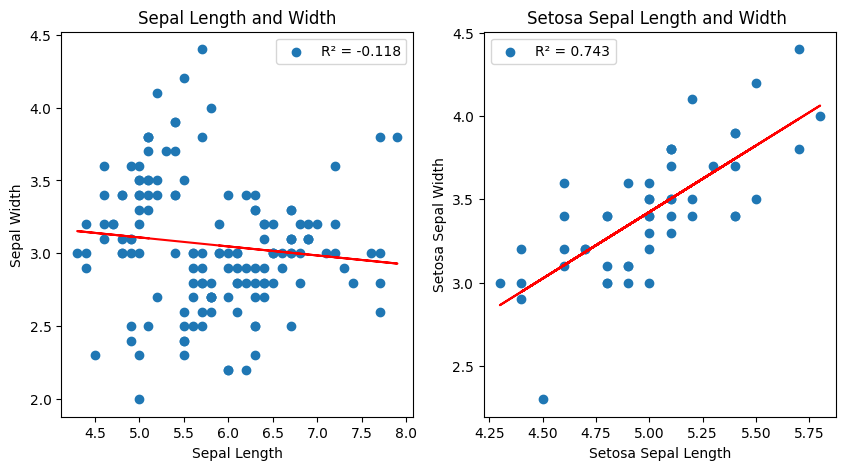

In [59]:
#https://pub.towardsai.net/5-paradoxes-in-statistics-every-data-scientist-should-be-familiar-with-478b74310099
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the iris data set
df = sns.load_dataset("iris")

# Subset the data to only include setosa species
df_s = df[df["species"] == "setosa"]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the relationship between sepal length and width.
slope, intercept, r_value, p_value, std_err = linregress(
    df["sepal_length"], df["sepal_width"]
)
ax1.scatter(df["sepal_length"], df["sepal_width"])
ax1.plot(
    df["sepal_length"],
    intercept + slope * df["sepal_length"],
    "r",
    label="fitted line",
)
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_title("Sepal Length and Width")
ax1.legend([f"R² = {r_value:.3f}"])

# Plot the relationship between setosa sepal length and width for setosa.
slope, intercept, r_value, p_value, std_err = linregress(
    df_s["sepal_length"], df_s["sepal_width"]
)
ax2.scatter(df_s["sepal_length"], df_s["sepal_width"])
ax2.plot(
    df_s["sepal_length"],
    intercept + slope * df_s["sepal_length"],
    "r",
    label="fitted line",
)
ax2.set_xlabel("Setosa Sepal Length")
ax2.set_ylabel("Setosa Sepal Width")
ax2.set_title("Setosa Sepal Length and Width ")
ax2.legend([f"R² = {r_value:.3f}"])

# Show the plot
plt.show()

# Overton Paradox
> If You Are Not a Liberal When You Are Young, You Have No Heart, and If You Are Not a Conservative When Old, You Have No Brain

Often attributed to W. Churchill but rather going back to Anselme Polycarpe Batbie: “Celui qui n'est pas républicain à vingt ans fait douter de la générosité de son âme; mais celui qui, après trente ans, persévère, fait douter de la rectitude de son esprit.” (#nerdyknowledge that takes brain capacity)

<img src="https://github.com/firrm/DAI/blob/main/assets/overton.png">

Using data from the [General Social Survey](https://gss.norc.org/Get-The-Data) age correlates with political views.

[Here](https://brilliant.org/lesson/the-overton-paradox/) is a very nice interactive visualization of the phenomenon.


# Simpson's Paradox
Simpson's paradox is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. It is sometimes given the descriptive title reversal paradox or amalgamation paradox. This result is often encountered in social-science and medical-science statistics and is particularly confounding when frequency data are unduly given causal interpretations. The paradox can be resolved when causal relations are appropriately addressed in the statistical modeling. 
[Wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox)




Lets look at an example: 1986 St Paul's Hospital in London. 

You observe the following data for treatment of kidney stones for 350 patients in each treatment group
- A open surgery. 
- B percutaneous nephrolithotomy (PCNL).  
(if you need to know what this is exactly NSFW [A](https://www.researchgate.net/publication/351620514/figure/fig2/AS:1024317362040843@1621227698860/Operative-steps-of-pyelolithotomy-the-renal-pelvis-is-opened-and-the-stone-is-extracted.jpg) and [B](https://brisbaneurologyclinic.com.au/wp-content/uploads/2019/06/PCNL.jpg))

However not every kidney stone is equal. There are two types of kidney stones: Small and Large. The data is as follows:

In [33]:
procedures = pd.DataFrame( [[87,263],[270,80]], index= index, columns = ["Small","Large"])
procedures["total"] = procedures.sum(axis=1)
procedures


,Small,Large,total
A open surgery,87,263,350
B PNCL,270,80,350


In [49]:
success = pd.DataFrame( [[81,192],[234,55]], index= index, columns = ["Small","Large"])
success["total"] = success.sum(axis=1)
success


,Small,Large,total
A open surgery,81,192,273
B PNCL,234,55,289


So our success rate is:

In [48]:
round(success["total"]/procedures["total"],2)

A open surgery    0.78
B PNCL            0.83
Name: total, dtype: float64

So PNCL is better than open surgery. That at least was the conclusion. 
But if we look at the success rate for small and large stones we see a different picture:

In [47]:
round(success/procedures,2)

,Small,Large,total
A open surgery,0.93,0.73,0.78
B PNCL,0.87,0.69,0.83


Now A is better for for both small and large stones.

<Axes: >

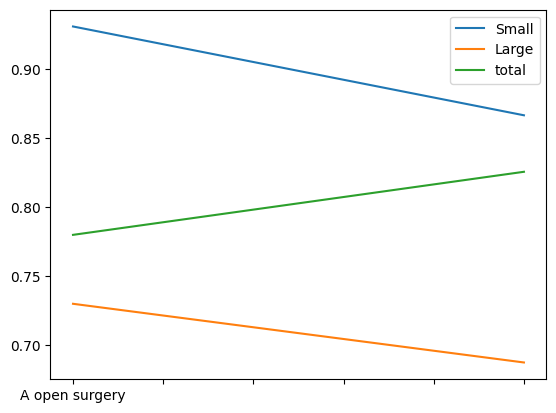

In [43]:
grouped_success_rate.plot()

So we see a reversal of the trend when we look at the data in more detail. Why? Because the distribution of small and large stones is different in the two groups.

In [46]:
round(procedures.T/procedures["total"],2)

,A open surgery,B PNCL
Small,0.25,0.77
Large,0.75,0.23
total,1.00,1.00


So 75% of the people with large kidney stones received open surgery while 77% of all with small kidney stones received PCNL. Makes sense. 
But suppose I told you the following:

- If you have a kidney stone, B is better for you.
- If you have a small kidney stone, A is better for you.
- If you have a large kidney stone, A is better for you.

What should you do? Well choose A since the success rate in each group is higher.
## What is the causality behind it?
Smaller stones are more likely to get removed by PCNL. Smaller stones are more likely to succeed, so B looks good since the cases are easier. 
A is used for hard(er) cases and so the success rate is lower.